# Principe



In [1]:
TAB = [ 7, 6, 2, 1, 3, 5, 8, 4 ]
print(TAB)

[7, 6, 2, 1, 3, 5, 8, 4]


# Partition

In [2]:
import include.helpers as asd1 

def partition(T,premier,dernier,comparer = asd1.plus_petit_ou_egal):
    asd1.affichage_debut_partition(T,premier,dernier)
    
    pivot = dernier-1

    i = premier-1
    j = pivot

    while True:
        while True:
            i += 1
            if i >= pivot or comparer(T[pivot],T[i]) :
                break
        while True:
            j -= 1
            if j < premier or comparer(T[j],T[pivot]):
                break
        if j < i:
            break           
        asd1.echanger(T,i,j)

    asd1.echanger(T,i,pivot)
        
    asd1.affichage_fin_partition(T,premier,dernier,i)
    return i

In [3]:
T = TAB.copy()
pivot = partition(T,0,len(T))

[7, 6, 2, 1, 3, 5, 8] 4 => [3, 1, 2] 4 [7, 5, 8, 6]


In [4]:
p = partition(T,0,pivot)

[3, 1] 2 => [1] 2 [3]


In [5]:
p = partition(T,pivot+1,len(T))

[7, 5, 8] 6 => [5] 6 [8, 7]


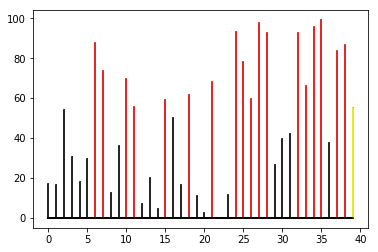

In [6]:
import numpy as np
T = np.random.uniform(0,100,40)
T[len(T)-1] = np.average(T) + 5
asd1.affiche_partition(T,0,len(T),len(T)-1)

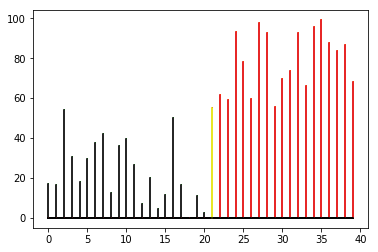

In [7]:
asd1.verbose = False
i = partition(T,0,len(T))

asd1.affiche_partition(T,0,len(T),i)

# Algorithme récursif

In [8]:
def tri_rapide_rec(T,premier,dernier,comparer):
    if premier < dernier-1:           # au moins deux éléments
        
        pivot = choix_du_pivot(T,premier,dernier);
        asd1.echanger(T,pivot,dernier-1)
    
        pivot = partition(T,premier,dernier,comparer)
        tri_rapide_rec(T,premier,pivot,comparer)
        tri_rapide_rec(T,pivot+1,dernier,comparer)
        
def tri_rapide(T,comparer = asd1.plus_petit_ou_egal):
    tri_rapide_rec(T,0,len(T),comparer)

In [9]:
def choix_du_pivot(T,premier,dernier):
    return dernier-1

In [10]:
T = TAB.copy()
asd1.verbose = True
tri_rapide(T)

[7, 6, 2, 1, 3, 5, 8] 4 => [3, 1, 2] 4 [7, 5, 8, 6]
[3, 1] 2 => [1] 2 [3]
[7, 5, 8] 6 => [5] 6 [8, 7]
[8] 7 => [] 7 [8]


# Complexité

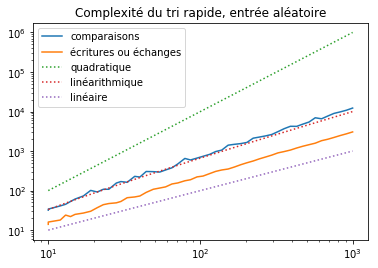

    N |     Comp. |      Ech.
-------------------------------
   10 |        32 |        14
   19 |       101 |        30
   37 |       229 |        69
   71 |       472 |       156
  138 |      1056 |       332
  268 |      2417 |       707
  517 |      5418 |      1448
 1000 |     12229 |      3047


In [11]:
asd1.evalue_complexite(tri_rapide, 
                      asd1.tableau_aleatoire, 
                      "tri rapide, entrée aléatoire")

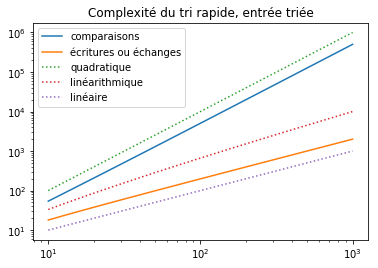

    N |     Comp. |      Ech.
-------------------------------
   10 |        54 |        18
   19 |       189 |        36
   37 |       702 |        72
   71 |      2555 |       140
  138 |      9590 |       274
  268 |     36045 |       534
  517 |    133902 |      1032
 1000 |    500499 |      1998


In [12]:
asd1.evalue_complexite(tri_rapide, 
                       asd1.tableau_trie, 
                       "tri rapide, entrée triée")

In [13]:
T = [ 1, 2, 3, 4, 5, 6, 7, 8]
asd1.verbose = True 
tri_rapide(T)

[1, 2, 3, 4, 5, 6, 7] 8 => [1, 2, 3, 4, 5, 6, 7] 8 []
[1, 2, 3, 4, 5, 6] 7 => [1, 2, 3, 4, 5, 6] 7 []
[1, 2, 3, 4, 5] 6 => [1, 2, 3, 4, 5] 6 []
[1, 2, 3, 4] 5 => [1, 2, 3, 4] 5 []
[1, 2, 3] 4 => [1, 2, 3] 4 []
[1, 2] 3 => [1, 2] 3 []
[1] 2 => [1] 2 []


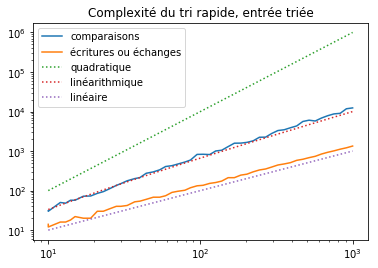

    N |     Comp. |      Ech.
-------------------------------
   10 |        31 |        14
   19 |        73 |        20
   37 |       201 |        52
   71 |       469 |        96
  138 |      1049 |       174
  268 |      2248 |       352
  517 |      6031 |       680
 1000 |     12339 |      1338


In [14]:
def choix_du_pivot(T,premier,dernier):
    return np.random.randint(premier,dernier)
    
asd1.evalue_complexite(tri_rapide, 
                       asd1.tableau_trie, 
                       "tri rapide, entrée triée")

In [15]:
def index_median(T,i1,i2,i3):
    if asd1.plus_petit(T[i1],T[i2]):
        if asd1.plus_petit(T[i2],T[i3]):
            return i2
        elif asd1.plus_petit(T[i1],T[i3]):
            return i3
        else:
            return i1
    else:
        if asd1.plus_petit(T[i1],T[i3]):
            return i1
        elif asd1.plus_petit(T[i2],T[i3]):
            return i3
        else:
            return i2

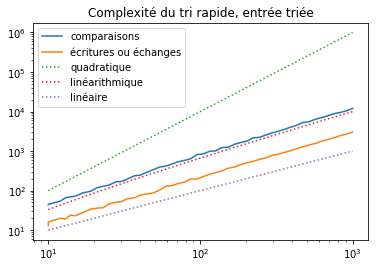

    N |     Comp. |      Ech.
-------------------------------
   10 |        44 |        13
   19 |        96 |        34
   37 |       238 |        66
   71 |       531 |       150
  138 |      1225 |       316
  268 |      2532 |       669
  517 |      5522 |      1425
 1000 |     12025 |      3012


In [16]:
def choix_du_pivot(T,premier,dernier):
    return index_median(T,premier,dernier-1,premier+(dernier-premier)//2)
    
asd1.evalue_complexite(tri_rapide, 
                       asd1.tableau_aleatoire, 
                       "tri rapide, entrée triée")

# Stabilité

Le tri rapide n'est pas stable. L'opération de partition déplace les éléments selon leur comparaison avec le pivot et rien ne garantit que deux éléments égaux restent ordonnés pareillement. 

Une question se pose cependant. Comment traite-t-on les éléments égaux au pivot lors de la partition? 


Le tri n'est pas stable


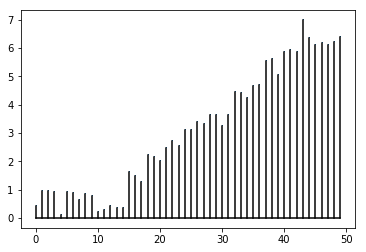

In [17]:
asd1.test_stabilite(tri_rapide)

In [18]:
def tableau_uniforme(n):
    return [1]*n

T = tableau_uniforme(10)
asd1.verbose = True
tri_rapide(T)

[1, 1, 1, 1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1] 1 [1, 1, 1, 1]
[1, 1, 1, 1] 1 => [1, 1] 1 [1, 1]
[1] 1 => [1] 1 []
[1] 1 => [1] 1 []
[1, 1, 1] 1 => [1, 1] 1 [1]
[1] 1 => [1] 1 []


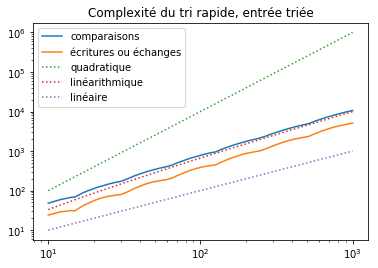

    N |     Comp. |      Ech.
-------------------------------
   10 |        48 |        24
   19 |       105 |        51
   37 |       237 |       114
   71 |       509 |       243
  138 |      1110 |       529
  268 |      2376 |      1131
  517 |      4973 |      2362
 1000 |     10607 |      5071


In [19]:
asd1.evalue_complexite(tri_rapide, 
                       tableau_uniforme, 
                       "tri rapide, entrée triée")

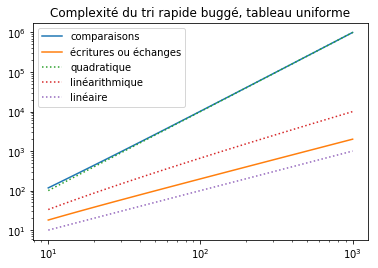

    N |     Comp. |      Ech.
-------------------------------
   10 |       117 |        18
   19 |       396 |        36
   37 |      1440 |        72
   71 |      5180 |       140
  138 |     19317 |       274
  268 |     72357 |       534
  517 |    268320 |      1032
 1000 |   1001997 |      1998


In [20]:
def tri_rapide_bugge(T):
    tri_rapide(T,asd1.plus_petit)
    
asd1.evalue_complexite(tri_rapide_bugge, 
                       tableau_uniforme, 
                       "tri rapide buggé, tableau uniforme")

In [21]:
T = tableau_uniforme(10)
asd1.verbose = True
cnt = tri_rapide_bugge(T)

[1, 1, 1, 1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1] 1 => [1, 1, 1, 1] 1 []
[1, 1, 1] 1 => [1, 1, 1] 1 []
[1, 1] 1 => [1, 1] 1 []
[1] 1 => [1] 1 []


# Visualisation

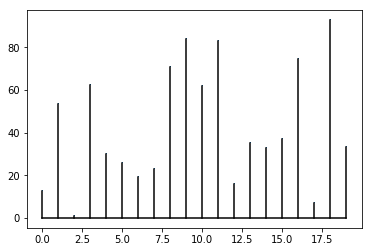

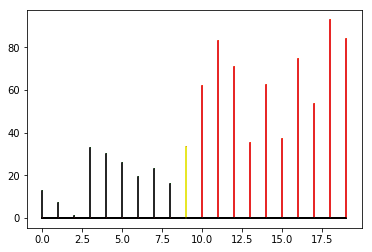

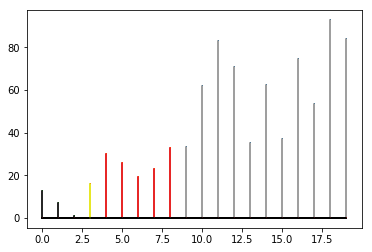

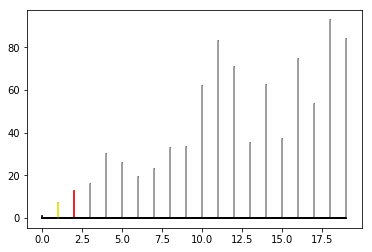

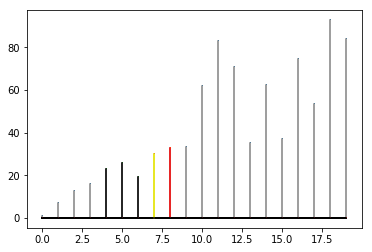

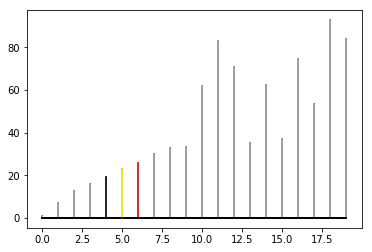

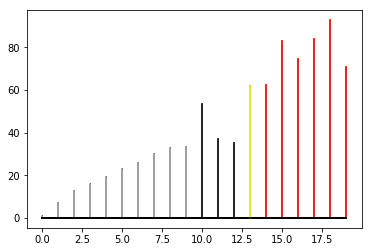

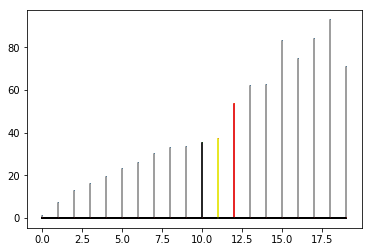

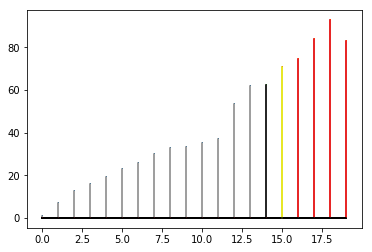

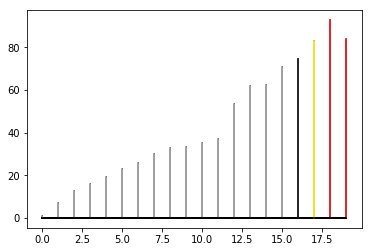

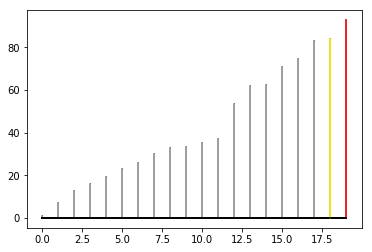

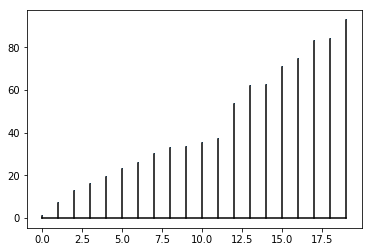

In [22]:
import matplotlib.pyplot as plt 
T = np.random.uniform(0,100,20)
plt.stem(T,markerfmt=',',linefmt='black',basefmt='black'); plt.show()

asd1.verbose = False; asd1.graphic = True
tri_rapide(T)

plt.stem(T,markerfmt=',',linefmt='black',basefmt='black'); plt.show()